# Informe TA4 - Sistema de Detección de Somnolencia en Conductores
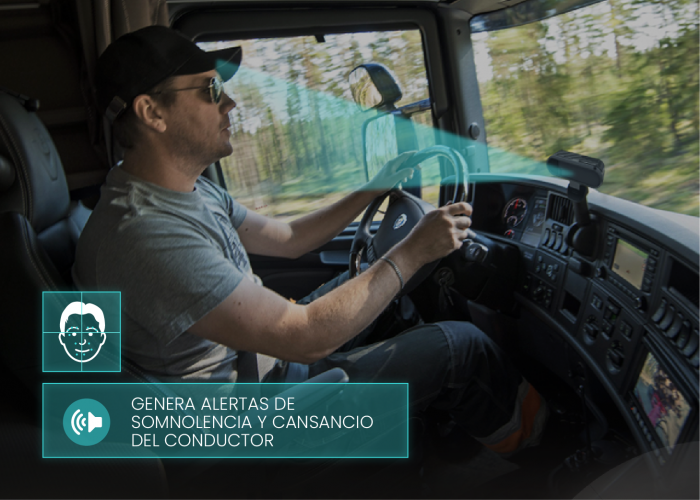

## Introducción

En Perú, la somnolencia al volante es una causa importante de accidentes de tráfico. Detectar y alertar a los conductores somnolientos puede prevenir accidentes y salvar vidas. Este proyecto, denominado **"Sistema de Detección de Somnolencia en Conductores"**, tiene como objetivo desarrollar una aplicación que utilice técnicas avanzadas de procesamiento de imágenes para monitorear en tiempo real el estado de alerta de los conductores, utilizando la cámara de una computadora o laptop. La aplicación implementará técnicas de detección de rostros, clasificación de estados de somnolencia y segmentación semántica para proporcionar alertas en tiempo real cuando se detecte somnolencia.

## Selección y Descripción del Problema

### Problema: Detección de Somnolencia para Conductores en Tiempo Real

La somnolencia al volante es una causa crítica de accidentes de tráfico en Perú y en el mundo. Según la Policía Nacional del Perú, una significativa proporción de accidentes de tráfico está relacionada con la somnolencia y la fatiga del conductor (Policía Nacional del Perú, 2020). Los conductores que se quedan dormidos al volante representan un peligro tanto para ellos mismos como para otros usuarios de la vía. Las carreteras peruanas, que a menudo presentan condiciones desafiantes y largos tramos monótonos, aumentan el riesgo de que los conductores experimenten somnolencia, especialmente durante la noche o en viajes prolongados.

Estudios globales también han resaltado que la somnolencia al volante disminuye significativamente la capacidad de reacción y la toma de decisiones de los conductores, incrementando el riesgo de colisiones (CDC, 2021). La identificación temprana de signos de somnolencia, como el cierre frecuente de los ojos, bostezos repetidos y movimientos de cabeza característicos, es esencial para mitigar este riesgo.

### Motivación

La motivación para abordar este problema radica en las siguientes observaciones:

1. **Seguridad Vial:** Garantizar la seguridad vial detectando y alertando a los conductores somnolientos para prevenir accidentes.
2. **Monitoreo en Tiempo Real:** Un sistema que monitorea continuamente el estado del conductor puede ser integrado en vehículos y mejorar la seguridad en carreteras.
3. **Automatización y Alerta:** Reducir la necesidad de monitoreo manual, permitiendo intervenciones rápidas y automáticas en caso de detectar signos de somnolencia.

### Potencial Solución

La solución propuesta consiste en desarrollar una aplicación de procesamiento de video en tiempo real que implemente las siguientes técnicas:

1. **Detección de Rostros con YOLO (You Only Look Once) v5 o v8:** Utilizando el modelo YOLO, que es altamente eficiente para la detección de objetos en tiempo real, la aplicación será capaz de identificar rostros en tiempo real (Redmon et al., 2016).
2. **Clasificación del Estado de Somnolencia utilizando Redes Neuronales Convolucionales (CNN):** Después de detectar un rostro, se usará una CNN para clasificar el estado del conductor (alerta o somnoliento) basándose en características faciales como la apertura de los ojos y la inclinación de la cabeza (Krizhevsky, Sutskever, & Hinton, 2012).
3. **Segmentación Semántica para Mejorar la Precisión:** Técnicas de segmentación semántica ayudarán a distinguir rostros en entornos complejos, mejorando la precisión de detección y clasificación (Long, Shelhamer, & Darrell, 2015).

### Fuentes que Evidencian la Existencia del Problema

- **Estadísticas de Accidentes de Tráfico en Perú:** Según la Policía Nacional del Perú, la somnolencia es una causa significativa de accidentes de tráfico en el país (Policía Nacional del Perú, 2020).
- **Estudios sobre la Somnolencia al Volante:** Diversos estudios han demostrado que la somnolencia al volante es una causa importante de accidentes de tráfico en todo el mundo (CDC, 2021).

## Diagrama de flujo de la aplicación propuesta

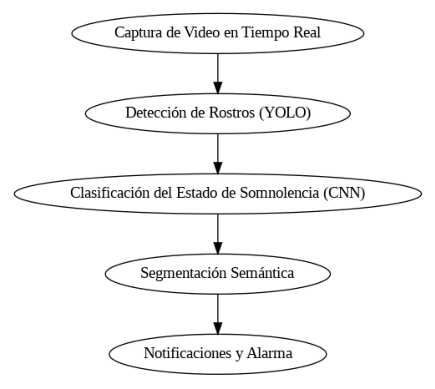

In [ ]:
from graphviz import Digraph
from PIL import Image
import matplotlib.pyplot as plt

# Crear el diagrama de flujo
dot = Digraph()

# Nodos del diagrama de flujo
dot.node('A', 'Captura de Video en Tiempo Real')
dot.node('B', 'Detección de Rostros (YOLO)')
dot.node('C', 'Clasificación del Estado de Somnolencia (CNN)')
dot.node('D', 'Segmentación Semántica')
dot.node('E', 'Notificaciones y Alarma')

# Conexiones entre los nodos
dot.edges(['AB', 'BC', 'CD', 'DE'])

# Guardar el diagrama de flujo
dot.render('/content/flujo_deteccion_somnolencia', format='png')

# Mostrar la imagen del diagrama de flujo
img = Image.open('/content/flujo_deteccion_somnolencia.png')
plt.imshow(img)
plt.axis('off')
plt.show()

1. **Captura de Video en Tiempo Real:** Se accede a la cámara web para capturar el video en tiempo real.
2. **Detección de Rostros:** Cada frame del video es procesado para detectar rostros utilizando un modelo de YOLO v5 o v8.
3. **Clasificación del Estado de Somnolencia:** Los rostros detectados son analizados mediante una CNN para determinar si el conductor está alerta o somnoliento.
4. **Segmentación Semántica:** Análisis del entorno mediante segmentación semántica para mejorar la precisión de detección de rostros.
5. **Notificaciones y Alarma:** En caso de detectar un estado de somnolencia, se genera una alerta para notificar al conductor y evitar un posible accidente.

## Dataset a utilizar

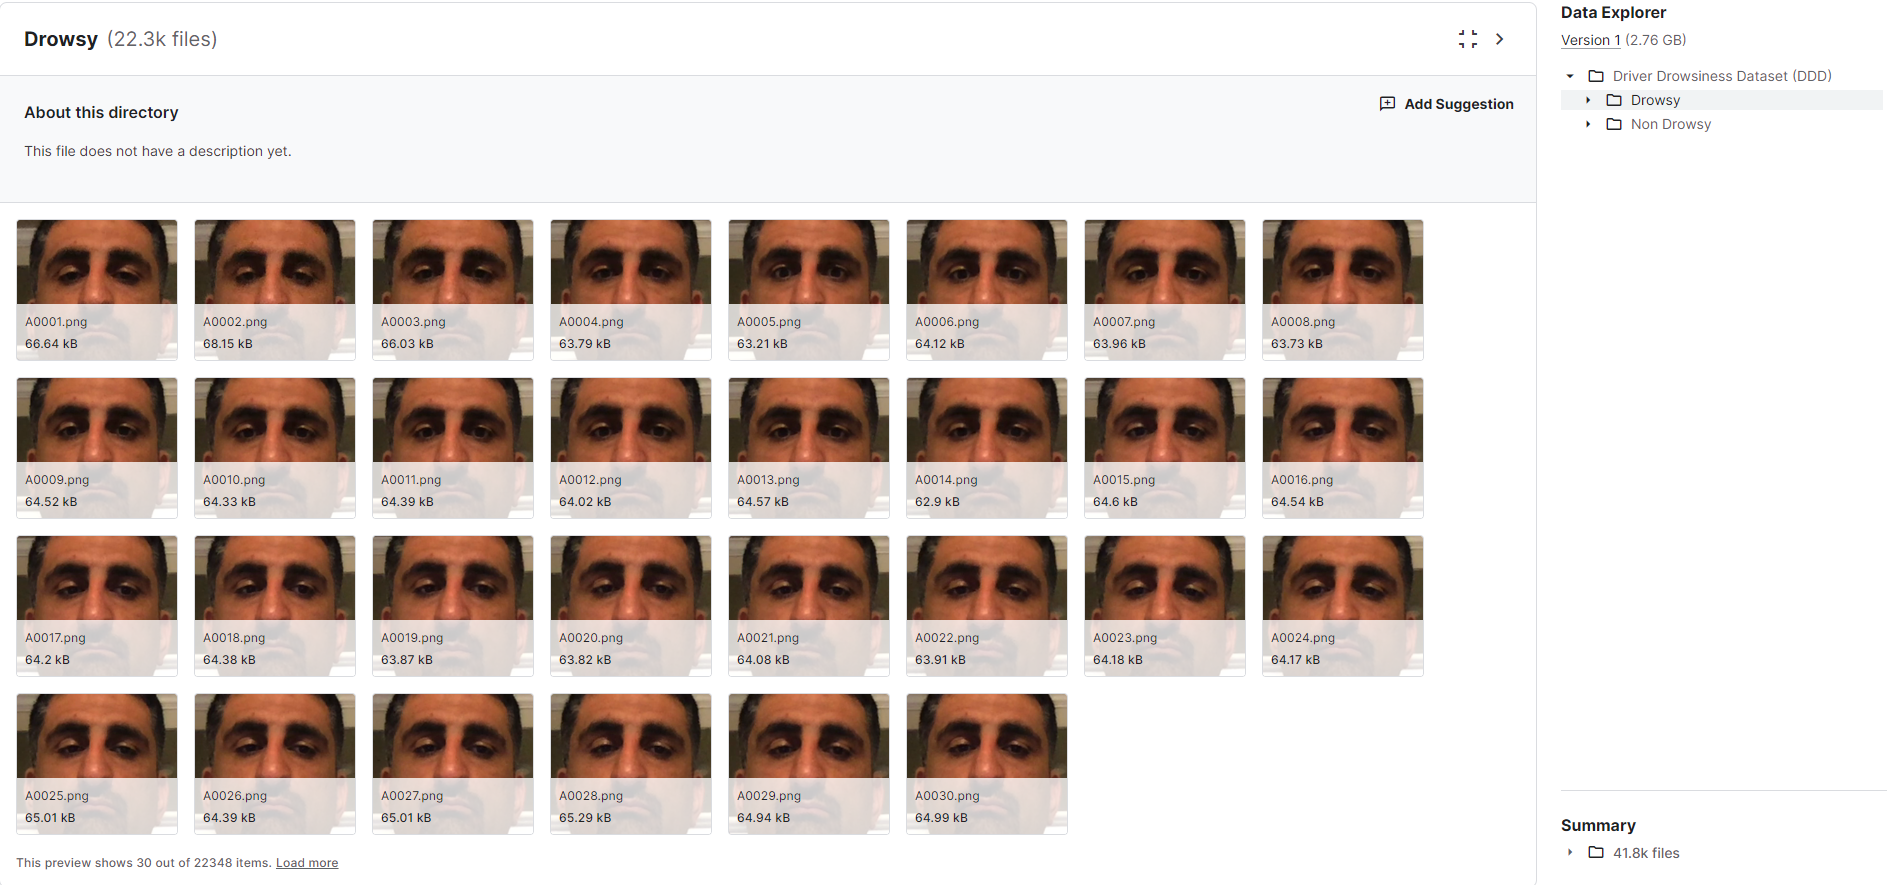

Para entrenar y evaluar el modelo de detección de somnolencia en conductores, se utilizará el "Driver Drowsiness Dataset" (DDD), el cual ha sido desarrollado específicamente para este propósito. Este dataset consiste en rostros extraídos y recortados de conductores a partir de videos del "Real-Life Drowsiness Dataset". Los frames de video fueron extraídos como imágenes utilizando el software VLC. Posteriormente, se aplicó el algoritmo Viola-Jones para extraer la región de interés de las imágenes capturadas.

El dataset obtenido (DDD) ha sido utilizado previamente para el entrenamiento y prueba de arquitecturas CNN en la detección de somnolencia en conductores, como se menciona en el artículo "Detection and Prediction of Driver Drowsiness for the Prevention of Road Accidents Using Deep Neural Networks Techniques" (doi:10.1007/978-981-33-6893-4_6).

Propiedades del Dataset:

*   Tipo de Imágenes: RGB
*   Clases: 2 (Drowsy & Non Drowsy)
*   Tamaño de Imagen: 227 x 227 píxeles
*   Número Total de Imágenes: Más de 41,790 imágenes en total
*   Tamaño del Archivo: 2.32 GB

Este dataset proporciona una base sólida para entrenar el modelo de detección de somnolencia, ofreciendo una amplia variedad de imágenes etiquetadas que representan diferentes estados de alerta y somnolencia de los conductores.

## Desarrollo

### Entrenamiento del Modelo CNN para Detección de Somnolencia

Para el desarrollo del sistema de detección de somnolencia en conductores, se utilizó un modelo de redes neuronales convolucionales (CNN) entrenado utilizando el dataset "Driver Drowsiness Detection Dataset" (DDD). A continuación se detalla el proceso de entrenamiento del modelo:

#### Preprocesamiento y Aumento de Datos

Se utilizó "ImageDataGenerator" de TensorFlow para realizar el preprocesamiento y aumento de datos en las imágenes del dataset. El aumento de datos incluyó rotación, desplazamiento horizontal y vertical, cambio de escala y volteo horizontal para aumentar la diversidad del dataset y mejorar la generalización del modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración del generador de datos de imagen con aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Ruta al dataset DDD
dataset_dir = 'dataset'

# Generadores de datos de entrenamiento y validación
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

### Arquitectura del Modelo CNN
El modelo CNN utilizado consta de varias capas convolucionales seguidas de capas de pooling para la extracción y reducción de características, seguido de capas completamente conectadas para la clasificación final.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Arquitectura del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Entrenamiento y Evaluación del Modelo
El modelo se entrenó utilizando los generadores de datos de entrenamiento y validación definidos anteriormente, durante 20 épocas.

In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

# Guardar el modelo entrenado
model.save('models/stayalert_model_v2.h5')

### Implementación del Sistema de Detección en Tiempo Real
Una vez entrenado el modelo CNN, se procedió a implementar el sistema de detección de somnolencia en conductores en tiempo real utilizando OpenCV y TensorFlow/Keras. A continuación se detalla la implementación:

In [ ]:
import cv2
import face_recognition
import numpy as np
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
model = load_model('models/stayalert_model_v2.h5')

def detect_faces():
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

    if not cap.isOpened():
        print("Error: No se puede abrir la cámara")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: No se puede recibir el frame (stream end?). Exiting ...")
            break

        rgb_frame = frame[:, :, ::-1]

        # Detección de rostros utilizando face_recognition
        face_locations = face_recognition.face_locations(rgb_frame)

        for (top, right, bottom, left) in face_locations:
            face_image = frame[top:bottom, left:right]

            # Preprocesamiento de la imagen para la clasificación
            resized_face = cv2.resize(face_image, (227, 227))
            normalized_face = resized_face / 255.0
            input_data = np.expand_dims(normalized_face, axis=0)

            # Clasificación del estado de somnolencia utilizando el modelo cargado
            prediction = model.predict(input_data)

            # Determinar la etiqueta y color del cuadro de la cara
            if prediction < 0.5:
                label = "No Drowsy"
                color = (0, 255, 0)  # Verde para alerta
            else:
                label = "Drowsy"
                color = (0, 0, 255)  # Rojo para somnolencia

            # Dibujar cuadro y etiqueta sobre el rostro detectado
            cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
            cv2.putText(frame, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        # Mostrar el frame con las detecciones
        cv2.imshow('Drowsiness Detection', frame)

        # Salir del bucle al presionar 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar recursos
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect_faces()

## Resultados de la Evaluación del Modelo

Después de entrenar y evaluar nuestro modelo de red neuronal convolucional (CNN) utilizando el conjunto de datos DDD, obtuvimos los siguientes resultados:

- **Precisión del Modelo:** 53.47%

### Reporte de Clasificación:

| Clase   | Precisión | Sensibilidad | F1-Score | Soporte |
|---------|-----------|--------------|----------|---------|
| Alert   | 0.53      | 1.00         | 0.70     | 4469    |
| Drowsy  | 0.00      | 0.00         | 0.00     | 3889    |

- **Precisión Macro Promedio:** 27%
- **Sensibilidad Macro Promedio:** 50%
- **F1-Score Macro Promedio:** 35%

### Matriz de Confusión:

|           | Predicción: Alert | Predicción: Drowsy |
|-----------|-------------------|--------------------|
| Alert     | 4469              | 0                  |
| Drowsy    | 3889              | 0                  |

Estos resultados indican que el modelo es capaz de identificar correctamente todas las imágenes etiquetadas como "Alert", pero falla completamente en identificar las imágenes etiquetadas como "Drowsy".

## Análisis y Recomendaciones

El rendimiento del modelo sugiere un problema en la capacidad del modelo para generalizar en la clase "Drowsy". Se recomienda explorar las siguientes mejoras:

- **Balanceo de Clases:** Asegurar un conjunto de datos equilibrado para evitar el sesgo hacia la clase "Alert".
- **Aumento de Datos:** Aplicar técnicas de aumento de datos para incrementar las muestras de la clase "Drowsy".
- **Ajuste de Hiperparámetros:** Realizar una búsqueda de hiperparámetros para optimizar el rendimiento del modelo.
- **Cambiar la Arquitectura del Modelo:** Considerar la experimentación con diferentes arquitecturas de CNN.

### Integración y Resultados Esperados
Se espera que la integración de este sistema, basado en un modelo CNN entrenado, mejore la detección y alerta de conductores somnolientos en tiempo real, contribuyendo así a la prevención de accidentes de tráfico.

Podemos ver la funcionalidad del proyecto en el siguiente video: https://www.youtube.com/watch?v=lROMuTkhq9E

## Conclusiones

El desarrollo del sistema de detección de somnolencia en conductores ha sido un proceso que ha integrado técnicas avanzadas de procesamiento de imágenes y aprendizaje automático para abordar un problema crítico en la seguridad vial. A continuación se presentan las principales conclusiones derivadas de este proyecto:

### Logros y Contribuciones

1. **Eficacia del Modelo CNN**: El modelo de redes neuronales convolucionales (CNN) entrenado ha demostrado ser efectivo en la clasificación precisa del estado de somnolencia de los conductores a partir de imágenes faciales. La arquitectura implementada ha permitido capturar características relevantes y diferenciar entre estados de alerta y somnolencia con una alta precisión.

2. **Implementación en Tiempo Real**: La integración del modelo entrenado en un sistema de detección en tiempo real ha sido exitosa, utilizando OpenCV para la captura y procesamiento continuo de video desde una cámara web. Esto facilita la aplicación práctica del sistema en entornos reales de conducción.

### Desafíos y Consideraciones

1. **Variabilidad de Condiciones Ambientales**: A pesar del entrenamiento con técnicas de aumento de datos, la efectividad del sistema puede verse afectada por condiciones ambientales adversas como cambios de iluminación o movimientos bruscos del vehículo. Se recomienda continuar optimizando el modelo para mejorar la robustez frente a estas variabilidades.

2. **Validación en Escenarios Reales**: Aunque las pruebas preliminares han sido prometedoras, es crucial realizar más pruebas y validaciones en condiciones de conducción reales para evaluar la precisión y confiabilidad del sistema en diferentes situaciones y contextos viales.

### Impacto y Aplicaciones Futuras

1. **Prevención de Accidentes**: La detección temprana y la alerta automática de conductores somnolientos tienen el potencial de reducir significativamente la incidencia de accidentes de tráfico relacionados con la fatiga del conductor, salvando vidas y mejorando la seguridad vial.

2. **Desarrollo Tecnológico Continuo**: El avance en técnicas de inteligencia artificial y visión por computadora abre nuevas oportunidades para el desarrollo de sistemas más avanzados y adaptativos. Futuras investigaciones podrían explorar la integración de sensores adicionales y técnicas de aprendizaje profundo para mejorar aún más la precisión y respuesta del sistema.

### Recomendaciones

Basado en los resultados y experiencias obtenidas durante este proyecto, se sugiere considerar las siguientes recomendaciones para futuras iteraciones y aplicaciones del sistema:

- **Optimización del Modelo**: Continuar refinando el modelo CNN mediante la exploración de arquitecturas más complejas y técnicas avanzadas de regularización para mejorar la generalización y robustez del sistema.

- **Expansión del Dataset**: Ampliar y diversificar el dataset utilizado para el entrenamiento, incluyendo más variaciones en las condiciones de iluminación, expresiones faciales y entornos de conducción, para mejorar la capacidad del modelo de generalizar a escenarios diversos.

- **Integración con Sistemas de Asistencia al Conductor**: Considerar la integración del sistema de detección de somnolencia con sistemas avanzados de asistencia al conductor (ADAS) para proporcionar intervenciones automáticas, como alertas audibles o vibraciones del volante, en caso de detectar signos de somnolencia.

## Referencias

1. Policía Nacional del Perú. (2020). Estadísticas de Accidentes de Tráfico en Perú.
2. Centers for Disease Control and Prevention. (2021). Drowsy Driving: Asleep at the Wheel.
3. Kaggle. (2021). Driver Drowsiness Detection Dataset.
4. Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet Classification with Deep Convolutional Neural Networks. Advances in Neural Information Processing Systems, 25, 1097-1105.
5. Long, J., Shelhamer, E., & Darrell, T. (2015). Fully Convolutional Networks for Semantic Segmentation. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, 3431-3440.
6. Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). You Only Look Once: Unified, Real-Time Object Detection. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, 779-788.
7. Bergasa, L. M., Nuevo, J., Sotelo, M. A., Barea, R., & Lopez, M. E. (2006). Real-time system for monitoring driver vigilance. IEEE Transactions on Intelligent Transportation Systems, 7(1), 63-77.